# Storing tables in a dictionary

In [2]:
#import libraries
from bs4 import BeautifulSoup
import os
html_tables={}
#for every table in the html datasets folder
for ds in os.listdir('html datasets'):
    #path to the file
    ds_path=f'html datasets/{ds}'
    #open paths only in read-only mode
    ds_file=open(ds_path,'r')
    #read the contents of the file into 'html'
    html=BeautifulSoup(ds_file)
    #find 'news-table' in the Soup and load it into 'html_table'
    #find(): Find a specific element on a page with a CSS Selector
    html_table = html.find(id='news-table')
    #add the table to our dictionary
    html_tables[ds] = html_table

# Sample extraction of text 

In [3]:
# Read one single day of headlines 
tsla = html_tables['tsla_22sep.html']
# Get all the table rows tagged in HTML with <tr> into 'tesla_tr'
tsla_tr = tsla.findAll('tr')

# For each row...
for i, table_row in enumerate(tsla_tr):
    # Read the text of the element 'a' into 'link_text'
    link_text = table_row.a.get_text()
    # Read the text of the element 'td' into 'data_text'
    data_text = table_row.td.get_text()
    # Print the count
    print(f'File number {i+1}:')
    # Print the contents of 'link_text' and 'data_text' 
    print(link_text)
    print(data_text)
    # The following exits the loop after four rows to prevent spamming the notebook, do not touch
    if i == 3:
        break

File number 1:
Billionaire investor questions Elon Musk getting 'a pass' after bombshell tweets
Sep-21-18 09:56PM  
File number 2:
Broadcoms Stock Looks Like a Winner
09:30PM  
File number 3:
SHAREHOLDER ALERT:  Pomerantz Law Firm Reminds Shareholders with Losses on their Investment in Tesla, Inc. of Class Action Lawsuit and Upcoming Deadline  TSLA
05:30PM  
File number 4:
Tesla's People Problem and the Inscrutable Musk: 2 Things That Make You Go Hmmm
05:30PM  


# Parsing text from all datasets

In [4]:
# Hold the parsed news into a list
parsed_news = []
# Iterate through the news
for file_name, news_table in html_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # Read the text from the tr tag into text
        text = x.get_text() 
        # Split the text in the td tag into a list 
        date_scrape = x.td.text.split()
        # If the length of 'date_scrape' is 1, load 'time' as the only element
        # If not, load 'date' as the 1st element and 'time' as the second
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split("_")[0]
        #extract headline
        headline=x.a.get_text()
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, headline])

# Printing the parsed_news

In [5]:
parsed_news

[['fb',
  'Jan-04-19',
  '06:22PM',
  'Facebook, Apple, Netflix, Amazon and Alphabet Power Friday Gains'],
 ['fb',
  'Jan-04-19',
  '05:15PM',
  'Earnings Reports for the Week of Jan. 7-11 (BBBY, KBH)'],
 ['fb',
  'Jan-04-19',
  '04:55PM',
  'COLUMN-Commentary: 2019 will be the year of more state control'],
 ['fb', 'Jan-04-19', '04:53PM', '3 Tech Trends to Watch in 2019'],
 ['fb', 'Jan-04-19', '04:30PM', "Will Denver's tech growth continue in 2019?"],
 ['fb', 'Jan-04-19', '02:46PM', 'Facebook to Prioritize Video in 2019'],
 ['fb',
  'Jan-04-19',
  '01:52PM',
  'ScotteVest CEO: How a Facebook Passion Project Evolved into a New Business'],
 ['fb',
  'Jan-04-19',
  '01:47PM',
  'Millennials Load Up on Battered Apple, Facebook, GE'],
 ['fb',
  'Jan-04-19',
  '01:00PM',
  'FAANGs See a Weak Start to 2019: More Pain Ahead for ETFs?'],
 ['fb',
  'Jan-04-19',
  '12:18PM',
  'U[PDATE: Netflix shares soar 9% as Goldman adds stock to its Conviction List'],
 ['fb',
  'Jan-04-19',
  '12:11PM',
  'W

# Import NLTK Library

In [6]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91739\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Intensity of few words are declared

In [7]:
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# New words and values
new_words = {
    'crushes': 10,
    'beats': 10,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}

# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()

# Update the lexicon
vader.lexicon.update(new_words)

# Core - Predicting sentiment from headlines

In [8]:
import pandas as pd

# Use these column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the list of lists into a DataFrame
scored_news = pd.DataFrame(parsed_news, columns=columns)

In [9]:
scored_news

,ticker,date,time,headline
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ..."
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?
...,...,...,...,...
495,tsla,Nov-16-18,08:31AM,VW says could build up to 15 million electric ...
496,tsla,Nov-16-18,08:12AM,Elon Musk to Prowl Production Lines in Push fo...
497,tsla,Nov-16-18,06:39AM,Tesla cuts prices on solar power systems as it...
498,tsla,Nov-16-18,06:00AM,Tesla Stretch Pushes Customers to Open Wallets...


In [10]:
# Iterate through the headlines and get the polarity scores
scores = [vader.polarity_scores(head) for head in scored_news.headline]

In [11]:
scores

[{'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.4767},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.698, 'pos': 0.302, 'compound': 0.3818},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.4588},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.419, 'neu': 0.581, 'pos': 0.0, 'compound': -0.7574},
 {'neg': 0.0, 'neu': 0.845, 'pos': 0.155, 'compound': 0.296},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.147, 'neu': 0.686, 'pos': 0.167, 'compound': 0.0516},
 {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.4391},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.888, 'pos': 0.112, 'compound': 0

In [12]:
# Convert the list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

In [13]:
scores_df

,neg,neu,pos,compound
0,0.000,0.631,0.369,0.4767
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.000,1.000,0.000,0.0000
4,0.000,0.698,0.302,0.3818
...,...,...,...,...
495,0.000,1.000,0.000,0.0000
496,0.000,1.000,0.000,0.0000
497,0.155,0.845,0.000,-0.2960
498,0.000,1.000,0.000,0.0000


In [14]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   neg       500 non-null    float64
 1   neu       500 non-null    float64
 2   pos       500 non-null    float64
 3   compound  500 non-null    float64
dtypes: float64(4)
memory usage: 15.8 KB


In [15]:
# Join the DataFrames
scored_news = scored_news.join(scores_df)

In [16]:
scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,fb,Jan-04-19,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.000,0.631,0.369,0.4767
1,fb,Jan-04-19,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.000,1.000,0.000,0.0000
2,fb,Jan-04-19,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.000,1.000,0.000,0.0000
3,fb,Jan-04-19,04:53PM,3 Tech Trends to Watch in 2019,0.000,1.000,0.000,0.0000
4,fb,Jan-04-19,04:30PM,Will Denver's tech growth continue in 2019?,0.000,0.698,0.302,0.3818
...,...,...,...,...,...,...,...,...
495,tsla,Nov-16-18,08:31AM,VW says could build up to 15 million electric ...,0.000,1.000,0.000,0.0000
496,tsla,Nov-16-18,08:12AM,Elon Musk to Prowl Production Lines in Push fo...,0.000,1.000,0.000,0.0000
497,tsla,Nov-16-18,06:39AM,Tesla cuts prices on solar power systems as it...,0.155,0.845,0.000,-0.2960
498,tsla,Nov-16-18,06:00AM,Tesla Stretch Pushes Customers to Open Wallets...,0.000,1.000,0.000,0.0000


In [17]:
# Convert the date column from string to datetime
scored_news['date'] = pd.to_datetime(scored_news.date).dt.date

In [19]:
scored_news

,ticker,date,time,headline,neg,neu,pos,compound
0,fb,2019-01-04,06:22PM,"Facebook, Apple, Netflix, Amazon and Alphabet ...",0.000,0.631,0.369,0.4767
1,fb,2019-01-04,05:15PM,Earnings Reports for the Week of Jan. 7-11 (BB...,0.000,1.000,0.000,0.0000
2,fb,2019-01-04,04:55PM,COLUMN-Commentary: 2019 will be the year of mo...,0.000,1.000,0.000,0.0000
3,fb,2019-01-04,04:53PM,3 Tech Trends to Watch in 2019,0.000,1.000,0.000,0.0000
4,fb,2019-01-04,04:30PM,Will Denver's tech growth continue in 2019?,0.000,0.698,0.302,0.3818
...,...,...,...,...,...,...,...,...
495,tsla,2018-11-16,08:31AM,VW says could build up to 15 million electric ...,0.000,1.000,0.000,0.0000
496,tsla,2018-11-16,08:12AM,Elon Musk to Prowl Production Lines in Push fo...,0.000,1.000,0.000,0.0000
497,tsla,2018-11-16,06:39AM,Tesla cuts prices on solar power systems as it...,0.155,0.845,0.000,-0.2960
498,tsla,2018-11-16,06:00AM,Tesla Stretch Pushes Customers to Open Wallets...,0.000,1.000,0.000,0.0000


In [34]:
scored_news.iloc[426:431,:]

,ticker,date,time,headline,neg,neu,pos,compound
426,tsla,2018-11-22,08:23AM,Tesla Cuts China Car Prices: Can Others Surviv...,0.196,0.804,0.0,-0.2960
427,tsla,2018-11-22,03:55AM,[$$] Tesla cuts prices in China as trade war b...,0.433,0.567,0.0,-0.7269
428,tsla,2018-11-22,01:24AM,Tesla Lowers Car Prices in China After Trade W...,0.463,0.537,0.0,-0.7096
429,tsla,2018-11-22,01:02AM,Tesla cuts China car prices to absorb hit from...,0.379,0.621,0.0,-0.7269
430,tsla,2018-11-22,12:30AM,Tesla cuts China car prices to absorb hit from...,0.379,0.621,0.0,-0.7269


# Plot the sentiments in subplots(compound)

In [43]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Group by date and ticker columns from scored_news and calculate the mean
mean_c = scored_news.groupby(['date', 'ticker']).mean();

In [44]:
mean_c

neg       neu       pos  compound
date       ticker                                        
2018-09-18 fb      0.104864  0.843682  0.051455 -0.052564
           tsla    0.112875  0.807688  0.079438 -0.085650
2018-09-19 fb      0.072920  0.805560  0.121640  0.057568
           tsla    0.066732  0.879244  0.054000 -0.025949
2018-09-20 fb      0.059567  0.870233  0.070200  0.018447
           tsla    0.067304  0.762609  0.170087  0.148757
2018-09-21 fb      0.052762  0.886381  0.060857  0.014310
           tsla    0.102150  0.813900  0.083950 -0.030190
2018-09-22 fb      0.000000  0.899000  0.101000  0.255300
2018-11-16 tsla    0.022000  0.931810  0.046190  0.026714
2018-11-17 tsla    0.000000  0.916500  0.083500  0.190900
2018-11-18 tsla    0.000000  0.956667  0.043333  0.067433
2018-11-19 tsla    0.093263  0.821105  0.085632  0.002384
2018-11-20 tsla    0.014154  0.941308  0.044538  0.066862
2018-11-21 tsla    0.056091  0.821273  0.122636  0.162045
2018-11-22 tsla    0.370000  0.630000  0.000000 -0.637260
2018-11-23 tsla    0.040000  0.920000  0.040000  0.000000
2018-11-25 tsla    0.052750  0.801500  0.145750  0.046725
2018-11-26 tsla    0.107833  0.828111  0.064056 -0.103317
2018-12-28 fb      0.146909  0.816273  0.036818 -0.120973
2018-12-29 fb      0.102333  0.836333  0.061333 -0.024933
2018-12-30 fb      0.033667  0.817167  0.149167  0.173817
2018-12-31 fb      0.152267  0.760000  0.087800 -0.076540
2019-01-01 fb      0.000000  0.791667  0.208333  0.291667
2019-01-02 fb      0.023857  0.882762  0.093381  0.080748
           tsla    0.183714  0.717449  0.098918 -0.095986
2019-01-03 fb      0.089250  0.817700  0.093050  0.045855
           tsla    0.142045  0.826682  0.031273 -0.131786
2019-01-04 fb      0.066524  0.858286  0.075190  0.015771
           tsla    0.031034  0.899345  0.069621  0.060776

In [45]:
# Unstack the column ticker
mean_c = mean_c.unstack('ticker');

In [46]:
mean_c

neg                 neu                 pos            \
ticker            fb      tsla        fb      tsla        fb      tsla   
date                                                                     
2018-09-18  0.104864  0.112875  0.843682  0.807688  0.051455  0.079438   
2018-09-19  0.072920  0.066732  0.805560  0.879244  0.121640  0.054000   
2018-09-20  0.059567  0.067304  0.870233  0.762609  0.070200  0.170087   
2018-09-21  0.052762  0.102150  0.886381  0.813900  0.060857  0.083950   
2018-09-22  0.000000       NaN  0.899000       NaN  0.101000       NaN   
2018-11-16       NaN  0.022000       NaN  0.931810       NaN  0.046190   
2018-11-17       NaN  0.000000       NaN  0.916500       NaN  0.083500   
2018-11-18       NaN  0.000000       NaN  0.956667       NaN  0.043333   
2018-11-19       NaN  0.093263       NaN  0.821105       NaN  0.085632   
2018-11-20       NaN  0.014154       NaN  0.941308       NaN  0.044538   
2018-11-21       NaN  0.056091       NaN  0.821273       NaN  0.122636   
2018-11-22       NaN  0.370000       NaN  0.630000       NaN  0.000000   
2018-11-23       NaN  0.040000       NaN  0.920000       NaN  0.040000   
2018-11-25       NaN  0.052750       NaN  0.801500       NaN  0.145750   
2018-11-26       NaN  0.107833       NaN  0.828111       NaN  0.064056   
2018-12-28  0.146909       NaN  0.816273       NaN  0.036818       NaN   
2018-12-29  0.102333       NaN  0.836333       NaN  0.061333       NaN   
2018-12-30  0.033667       NaN  0.817167       NaN  0.149167       NaN   
2018-12-31  0.152267       NaN  0.760000       NaN  0.087800       NaN   
2019-01-01  0.000000       NaN  0.791667       NaN  0.208333       NaN   
2019-01-02  0.023857  0.183714  0.882762  0.717449  0.093381  0.098918   
2019-01-03  0.089250  0.142045  0.817700  0.826682  0.093050  0.031273   
2019-01-04  0.066524  0.031034  0.858286  0.899345  0.075190  0.069621   

            compound            
ticker            fb      tsla  
date                            
2018-09-18 -0.052564 -0.085650  
2018-09-19  0.057568 -0.025949  
2018-09-20  0.018447  0.148757  
2018-09-21  0.014310 -0.030190  
2018-09-22  0.255300       NaN  
2018-11-16       NaN  0.026714  
2018-11-17       NaN  0.190900  
2018-11-18       NaN  0.067433  
2018-11-19       NaN  0.002384  
2018-11-20       NaN  0.066862  
2018-11-21       NaN  0.162045  
2018-11-22       NaN -0.637260  
2018-11-23       NaN  0.000000  
2018-11-25       NaN  0.046725  
2018-11-26       NaN -0.103317  
2018-12-28 -0.120973       NaN  
2018-12-29 -0.024933       NaN  
2018-12-30  0.173817       NaN  
2018-12-31 -0.076540       NaN  
2019-01-01  0.291667       NaN  
2019-01-02  0.080748 -0.095986  
2019-01-03  0.045855 -0.131786  
2019-01-04  0.015771  0.060776

In [47]:
# Get the cross-section of compound in the 'columns' axis
mean_c = mean_c.xs('compound', axis='columns');

In [48]:
mean_c

ticker,fb,tsla
date,,
2018-09-18,-0.052564,-0.085650
2018-09-19,0.057568,-0.025949
2018-09-20,0.018447,0.148757
2018-09-21,0.014310,-0.030190
2018-09-22,0.255300,NaN
2018-11-16,NaN,0.026714
2018-11-17,NaN,0.190900
2018-11-18,NaN,0.067433
2018-11-19,NaN,0.002384


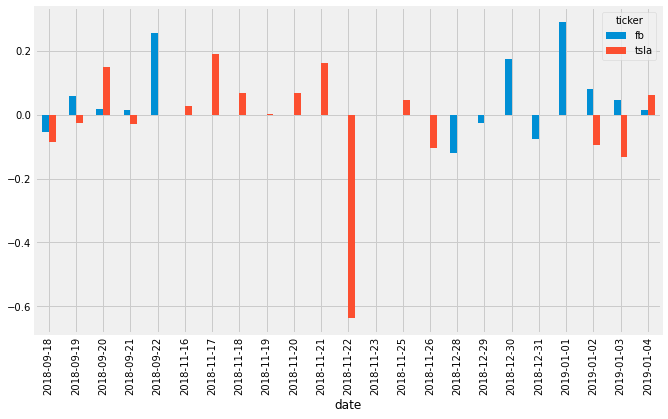

In [49]:
# Plot a bar chart with pandas
mean_c.plot.bar(figsize = (10, 6));

# Removing Duplicates

In [51]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = scored_news.headline.count()

# Drop duplicates based on ticker and headline
scored_news_clean = scored_news.drop_duplicates(subset= ['headline', 'ticker'])

# Count number of headlines after dropping duplicates
num_news_after = scored_news_clean.headline.count()

# Print before and after numbers to get an idea of how we did 
print(f"'No.of before: {num_news_before} headlines'",end=" ")
f"No.of after : {num_news_after} headlines"

'No.of before: 500 headlines' 

'No.of after : 476 headlines'

# Sentiment on single trading day and stock

In [52]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['ticker', 'date'])

# Cross-section the fb row
single_day = single_day.xs('fb')

# Select the 3rd of January of 2019
single_day = single_day.loc['2019-01-03']

# Convert the datetime string to just the time
single_day['time'] = pd.to_datetime(single_day['time']).dt.time

# Set the index to time 
single_day = single_day.set_index('time')

# Sort it
single_day = single_day.sort_index()

In [53]:
single_day

,headline,neg,neu,pos,compound
time,,,,,
06:00:00,Why Internet Censorship Doesnt Work and Never ...,0.000,1.000,0.000,0.0000
08:04:00,"3 Big Stock Charts for Thursday: Medtronic, Fa...",0.000,1.000,0.000,0.0000
09:07:00,"The Zacks Analyst Blog Highlights: Facebook, W...",0.000,0.846,0.154,0.2500
09:12:00,Why The FAANGs Are Crucial To A 2019 Market Rally,0.000,1.000,0.000,0.0000
09:34:00,Apple warning stoking fears of slowdown in Chi...,0.426,0.574,0.000,-0.6369
09:48:00,"Stock Market News For Jan 3, 2019",0.000,1.000,0.000,0.0000
09:58:00,Facebook Falls 3%,0.981,0.019,0.000,-0.9993
10:08:00,Mark Zuckerberg Halts Stock Sales as Facebook ...,0.000,0.784,0.216,0.2960
10:21:00,Facebook Under Fire for Collecting Data From A...,0.231,0.769,0.000,-0.3400


# Visualize the single day

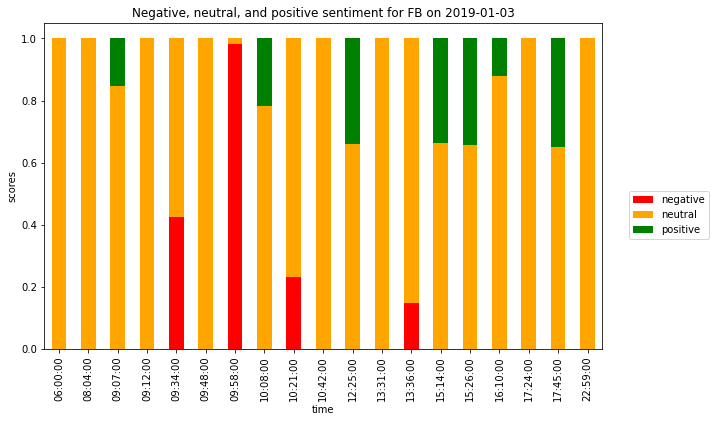

In [78]:
TITLE = "Negative, neutral, and positive sentiment for FB on 2019-01-03"
COLORS = ["red","orange", "green"]

# Drop the columns that aren't useful for the plot
plot_day = single_day.drop(['compound', 'headline'], 1)

# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral', 'positive']

# Plot a stacked bar chart
plot_day.plot.bar(stacked=True, figsize=(10, 6), title=TITLE, color=COLORS,ylabel='scores').legend(bbox_to_anchor=(1.2, 0.5))

# Sample plot of all FB sentiment results 

In [84]:
# Set the index to ticker and date
all_day_fb = scored_news_clean.set_index(['ticker'])

# Cross-section the fb row
all_day_fb = all_day_fb.xs('fb')

# Set the index to time 
all_day_fb = all_day_fb.set_index('date')

# Sort it
all_day_fb = all_day_fb.sort_index()


In [85]:
all_day_fb

,time,headline,neg,neu,pos,compound
date,,,,,,
2018-09-18,12:50PM,Facebook Is Facing a Legal Battle with ACLU & CWA,0.257,0.594,0.149,-0.2732
2018-09-18,08:20PM,[$$] Facebook and Financial Firms Tussled for ...,0.000,1.000,0.000,0.0000
2018-09-18,08:20PM,[$$] Bertelsmann to Merge Unit That Moderates ...,0.000,1.000,0.000,0.0000
2018-09-18,07:12PM,Oregon using Facebook to remind inactive voter...,0.000,1.000,0.000,0.0000
2018-09-18,06:56PM,The Law Offices of Howard G. Smith Reminds Inv...,0.152,0.848,0.000,-0.3400
...,...,...,...,...,...,...
2019-01-04,08:33AM,Twitter Still Vulnerable to Hacking by Terrori...,0.524,0.476,0.000,-0.7650
2019-01-04,06:00AM,Apple vs. Facebook. Whos Had the Worse Run?,0.307,0.693,0.000,-0.4767
2019-01-04,05:26AM,Facebook Rises 3%,0.000,1.000,0.000,0.0000


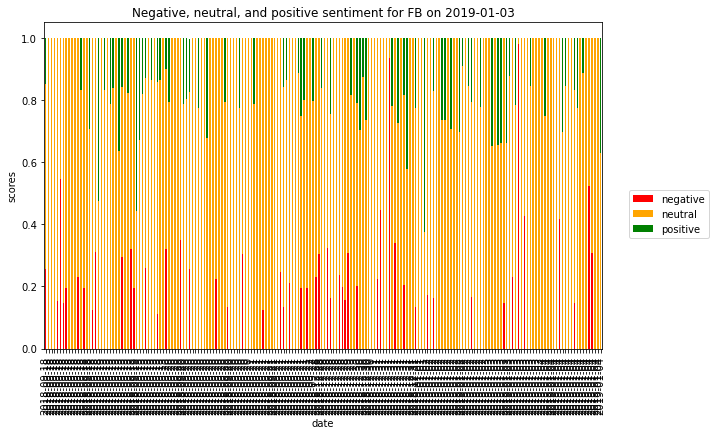

In [86]:
TITLE = "Negative, neutral, and positive sentiment for FB on 2019-01-03"
COLORS = ["red","orange", "green"]

# Drop the columns that aren't useful for the plot
plot_day = all_day_fb.drop(['compound', 'headline','time'], 1)

# Change the column names to 'negative', 'positive', and 'neutral'
plot_day.columns = ['negative', 'neutral', 'positive']

# Plot a stacked bar chart
plot_day.plot.bar(stacked=True, figsize=(10, 6), title=TITLE, color=COLORS,ylabel='scores').legend(bbox_to_anchor=(1.2, 0.5))